# SLiSeFilters: Symmetric non-Linear Optimized Least-Squares Filters for Subspace Iteration with Rational Filters

For an introduction into the topic see our preprint [here](https://arxiv.org/pdf/1704.03255.pdf).

In [10]:
import Plots
import MatrixDepot
import BenchmarkProfiles
import SLiSeFilters
import SpectrumSlicingTestSuite
Plots.pyplot();

We obtain a Gauss-Legendre filter with 4 poles in the upper right quadrant; 16 poles total:

In [11]:
zGauss,aGauss = SLiSeFilters.points("gauss",4);

A plot of the Gauss-Legendre filter can be obtained as shown below.
In addition to the filter itself we also plot the poles of the filter.
Note that we plot the function value on the y-axis for the filter, we use the y-axis as the imaginary axis for the poles.

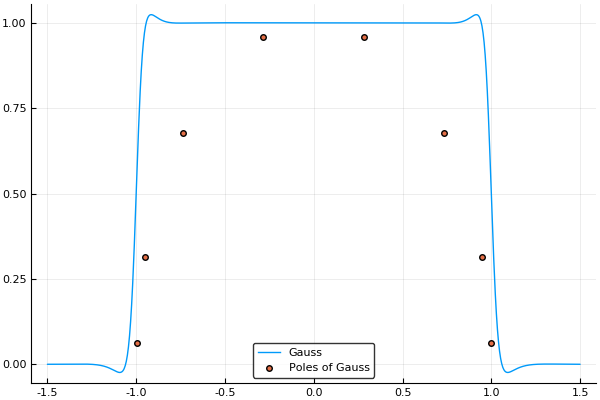

In [12]:
x = linspace(-1.5,1.5,1000)
f = function(z,a) SpectrumSlicingTestSuite.phi(z,a,[-1,1],x) |> real end

Plots.plot(x, f(zGauss,aGauss), label="Gauss")
Plots.scatter!( real([zGauss; -conj(zGauss)]), imag([zGauss; -conj(zGauss)]), label="Poles of Gauss" )

As described in the preprint we obtain a weight function with `createConfig` and optimize the filters using our Levenberg-Marquardt implementation.

In [13]:
c = SLiSeFilters.createConfig("gamma");
zSLiSe,aSLiSe = SLiSeFilters.levMar(zGauss,aGauss,c);

iter: 10000	resid: 7.305688874803540e-05	mu: 3.125000e+00	v: 2.000000e+00
iter: 20000	resid: 6.586243419559601e-05	mu: 6.250000e+00	v: 4.000000e+00
iter: 30000	resid: 5.970343859251770e-05	mu: 3.125000e+00	v: 2.000000e+00
iter: 40000	resid: 5.437817728048966e-05	mu: 3.125000e+00	v: 2.000000e+00
iter: 50000	resid: 4.994678236425187e-05	mu: 3.125000e+00	v: 2.000000e+00
iter: 60000	resid: 4.637752360237002e-05	mu: 3.125000e+00	v: 2.000000e+00
iter: 70000	resid: 4.353518987942895e-05	mu: 1.250000e+01	v: 8.000000e+00
iter: 80000	resid: 4.121797901435187e-05	mu: 6.250000e+00	v: 4.000000e+00
iter: 90000	resid: 3.924208503014448e-05	mu: 6.250000e+00	v: 2.000000e+00
iter: 100000	resid: 3.741871427132004e-05	mu: 1.250000e+01	v: 2.000000e+00
iter: 110000	resid: 3.566042926106405e-05	mu: 2.500000e+01	v: 8.000000e+00
iter: 120000	resid: 3.393849291044582e-05	mu: 3.125000e+00	v: 2.000000e+00
iter: 130000	resid: 3.235770188836362e-05	mu: 3.125000e+00	v: 2.000000e+00
iter: 140000	resid: 3.097457789524

(Complex{Float64}[-0.999716+0.0100714im, -0.985299+0.0834839im, -0.890636+0.30265im, -0.435696+0.697878im], Complex{Float64}[0.00522242-0.000328736im, 0.0197875-0.00532048im, 0.0532178-0.0321933im, 0.0536992-0.121132im])

The resulting filter are plotted against the original Gauss filter below.

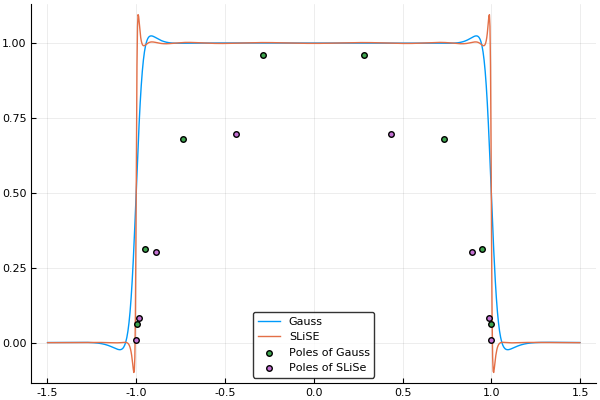

In [14]:
x = linspace(-1.5,1.5,1000)
f = function(z,a) SpectrumSlicingTestSuite.phi(z,a,[-1,1],x) |> real end
Plots.plot(x, f(zGauss,aGauss), label="Gauss")
Plots.plot!(x, f(zSLiSe,aSLiSe), label="SLiSE")
Plots.scatter!( real([zGauss; -conj(zGauss)]), imag([zGauss; -conj(zGauss)]), label="Poles of Gauss" )
Plots.scatter!( real([zSLiSe; -conj(zSLiSe)]), imag([zSLiSe; -conj(zSLiSe)]), label="Poles of SLiSe" )

Shown below are estimates the performance of these filters within FEAST, or any other solver that uses Subspace Iteration accelerated with a rational filter function. For details see the [SpectrumSlicingTestSuite](https://github.com/SimLabQuantumMaterials/ChASE) package.

In [18]:
import SpectrumSlicingTestSuite

function filterPerfProf( matrix::String )
try
MatrixDepot.matrixdepot("PARSEC/Si2", :get)
catch
end

const B = MatrixDepot.matrixdepot(matrix, :r) |> full |> Hermitian;
const n = size(B)[1];
const nexPercentage = 0.5;
const nvec = 10;
V = (randn(n,nvec) + randn(n,nvec) * 1im) / sqrt(2);
intvls,W = SpectrumSlicingTestSuite.testIntervals(B,V);
convergenceRatioGauss = SpectrumSlicingTestSuite.convergenceratio(zGauss,aGauss,W,intvls,nexPercentage);
convergenceRatioSLiSe = SpectrumSlicingTestSuite.convergenceratio(zSLiSe,aSLiSe,W,intvls,nexPercentage);
BenchmarkProfiles.performance_profile(
    [convergenceRatioGauss convergenceRatioSLiSe],
    ["Gauss","SLiSe"],
    logscale=false, title=matrix)
end;

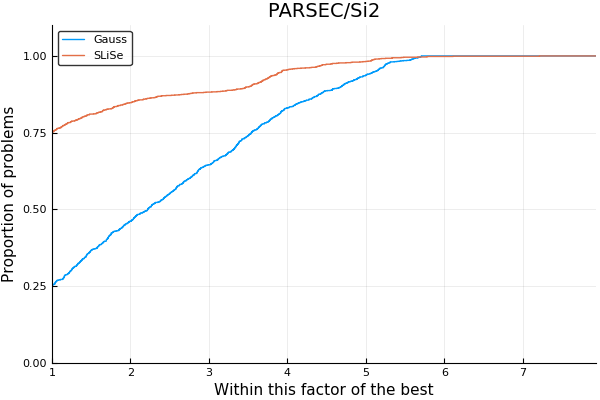

In [19]:
filterPerfProf( "PARSEC/Si2" )

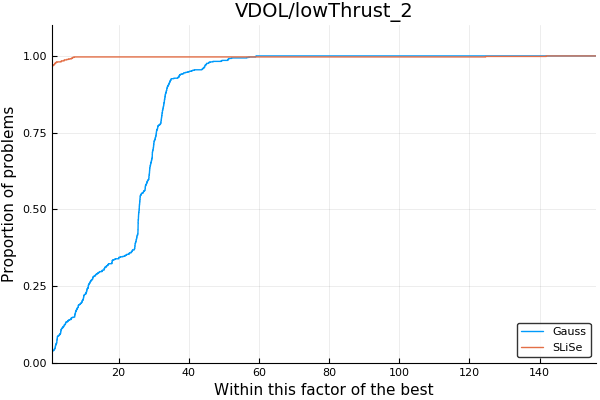

In [20]:
filterPerfProf( "VDOL/lowThrust_2" )